# I. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----Classification ML Algorithms--------------
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.svm import SVC 

from sklearn.neighbors import KNeighborsClassifier

# ----------HyperParameter Tuning --------------
from sklearn.model_selection import GridSearchCV

# ---------Evaluating Performance Metrics-------
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# ---------SMOTE for OvrSampling----------------
from imblearn.over_sampling import SMOTE

# --------Supress Future Warning----------------
import warnings
warnings.filterwarnings("ignore")

# II. Importing Data and Descriptive Statistical Analysis

In [2]:
df = pd.read_csv('../data/CustomerData.csv')

In [3]:
df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [4]:
df.shape

(2000, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,2000.0,2015.000000,0.000000,2015.0,2015.0000,2015.000,2015.0000,2015.00
customer_id,2000.0,554887.157500,261033.690318,100198.0,328634.7500,567957.500,773280.2500,999961.00
age,2000.0,38.690500,10.206410,18.0,32.0000,37.000,44.0000,82.00
no_of_days_subscribed,2000.0,99.750000,39.755386,1.0,73.0000,99.000,127.0000,243.00
weekly_mins_watched,2000.0,270.178425,80.551627,0.0,218.2125,269.925,324.6750,526.20
minimum_daily_mins,2000.0,10.198700,2.785519,0.0,8.4000,10.200,12.0000,20.00
maximum_daily_mins,2000.0,30.620780,9.129165,0.0,24.7350,30.590,36.7975,59.64
weekly_max_night_mins,2000.0,100.415500,19.529454,42.0,87.0000,101.000,114.0000,175.00
videos_watched,2000.0,4.482500,2.487728,0.0,3.0000,4.000,6.0000,19.00
maximum_days_inactive,1972.0,3.250507,0.809084,0.0,3.0000,3.000,4.0000,6.00


In [7]:
df.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

# III. Data Cleaning

In [8]:
df[df.isnull()['churn']==True].index

Int64Index([  81,   82,  120,  121,  156,  157,  194,  195,  228,  290,  291,
             364,  365,  410,  451,  452,  495,  535,  536,  537,  538,  676,
             677,  678,  767,  768,  813,  875,  876,  910,  911,  915, 1993,
            1994, 1995],
           dtype='int64')

In [9]:
df.drop(df[df.isnull()['churn']==True].index, inplace=True)

In [10]:
df.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     26
customer_support_calls     0
churn                      0
dtype: int64

In [11]:
df.shape

(1965, 16)

In [12]:
df['gender'].value_counts()

Male      1032
Female     909
Name: gender, dtype: int64

In [13]:
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

In [14]:
df['maximum_days_inactive'].median()

3.0

In [15]:
df['maximum_days_inactive'] = df['maximum_days_inactive'].fillna(df['maximum_days_inactive'].median())

In [16]:
df.isnull().sum()

year                      0
customer_id               0
phone_no                  0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

In [17]:
df['multi_screen'].value_counts()

no     1769
yes     196
Name: multi_screen, dtype: int64

In [18]:
df['mail_subscribed'].value_counts()

no     1404
yes     561
Name: mail_subscribed, dtype: int64

# IV Data Visualization

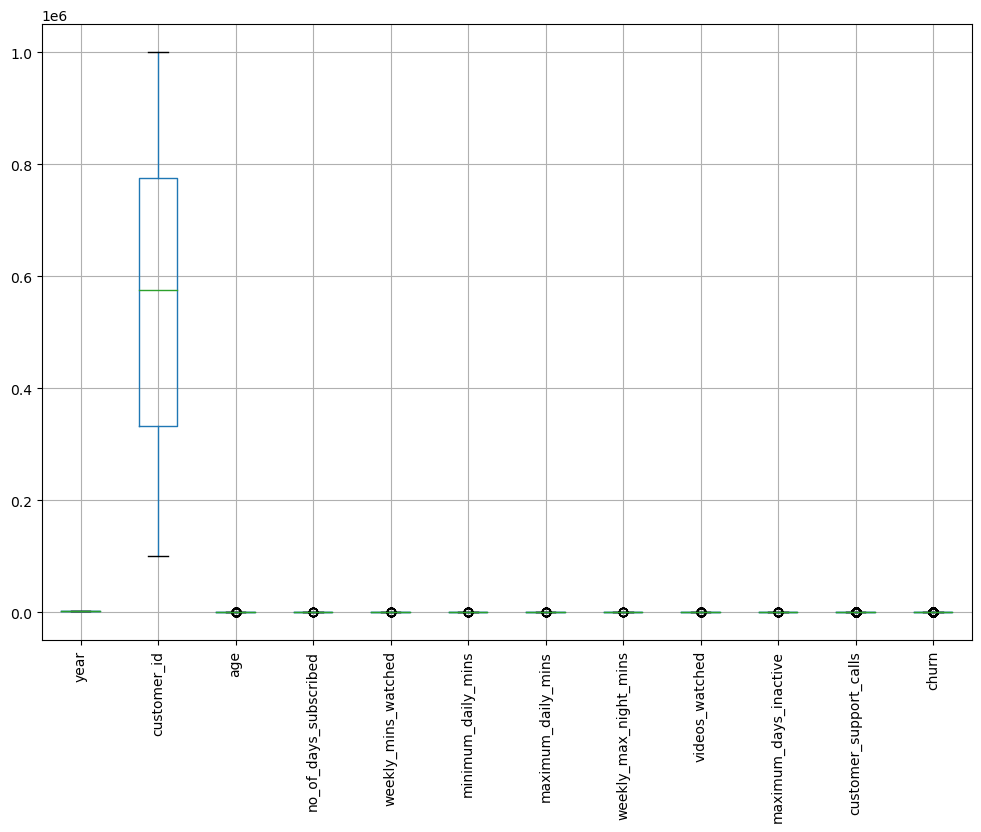

In [19]:
plt.figure(figsize=(12,8))
df.boxplot()
plt.xticks(rotation=90)
plt.show()

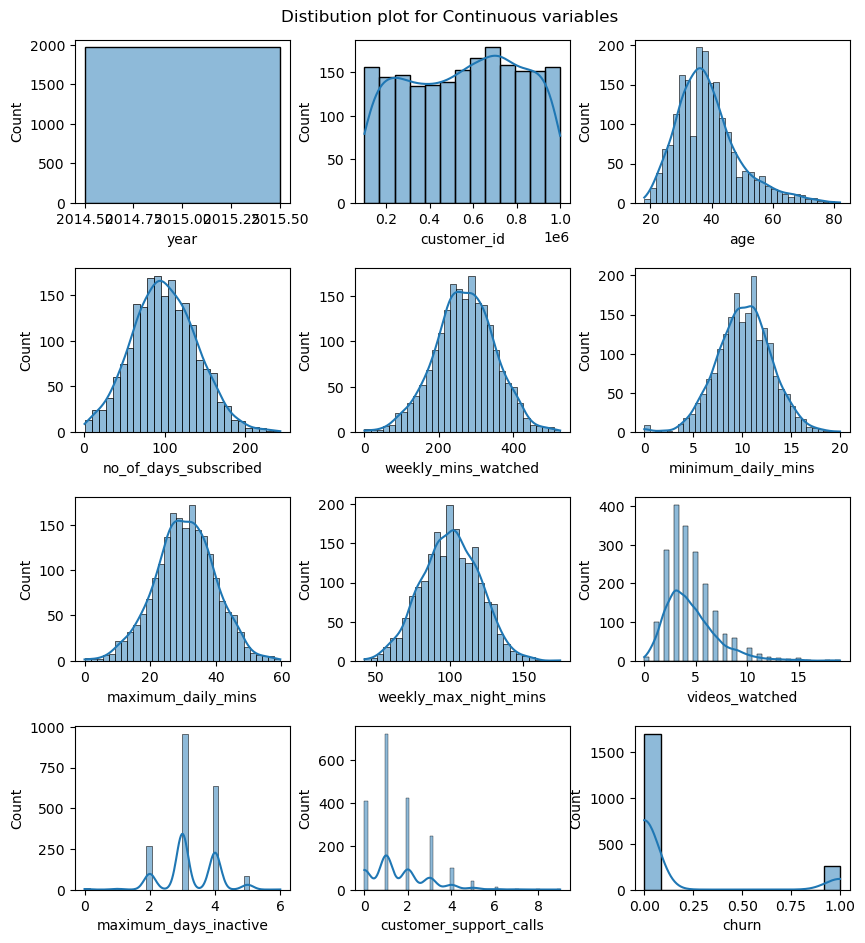

In [20]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.4, top=0.95, wspace= 0.3, bottom=0.1)
fig.tight_layout()
for idx, col in enumerate(df.select_dtypes(include=['int64','float64']).columns):
    ax1 = fig.add_subplot(4,3,idx+1)
    sns.histplot(data = df, x = col, kde = True)
    
plt.suptitle('Distibution plot for Continuous variables')
plt.show()

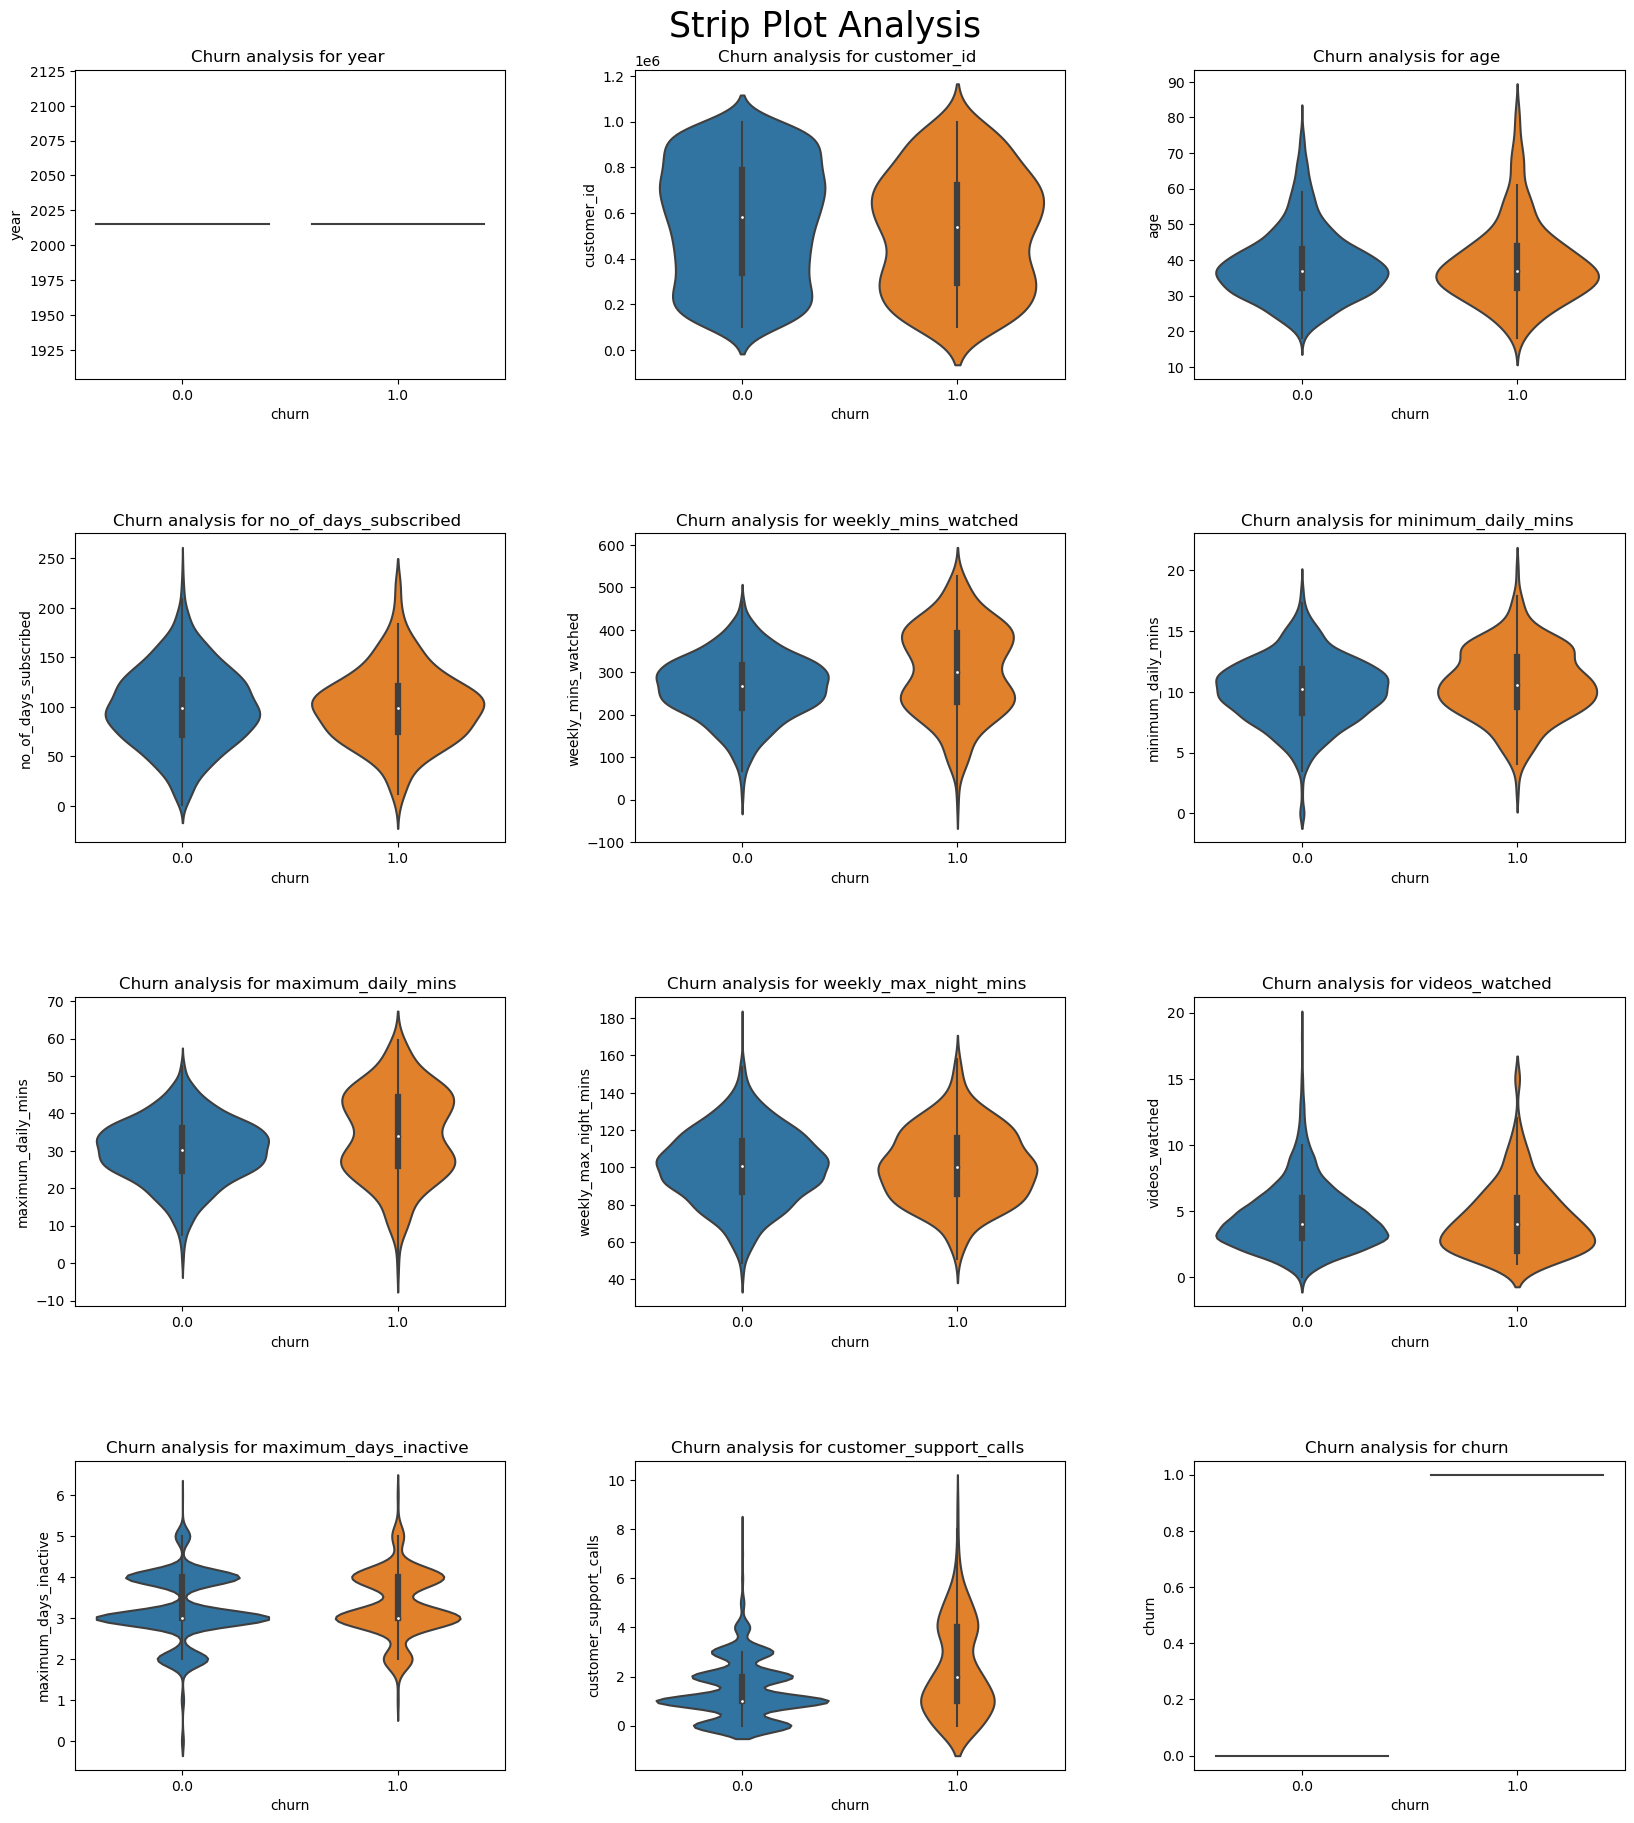

In [21]:
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.5, top=0.95, wspace= 0.3, bottom = 0.1)
fig.tight_layout()

for idx, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    ax1 = fig.add_subplot(4,3,idx+1)
    sns.violinplot(y=df[col], x=df['churn'],ax=ax1)
    ax1.title.set_text(f'Churn analysis for {col} ')
    ax1.set_ylabel(col)
    
plt.suptitle('Strip Plot Analysis', fontsize=25)
plt.show()

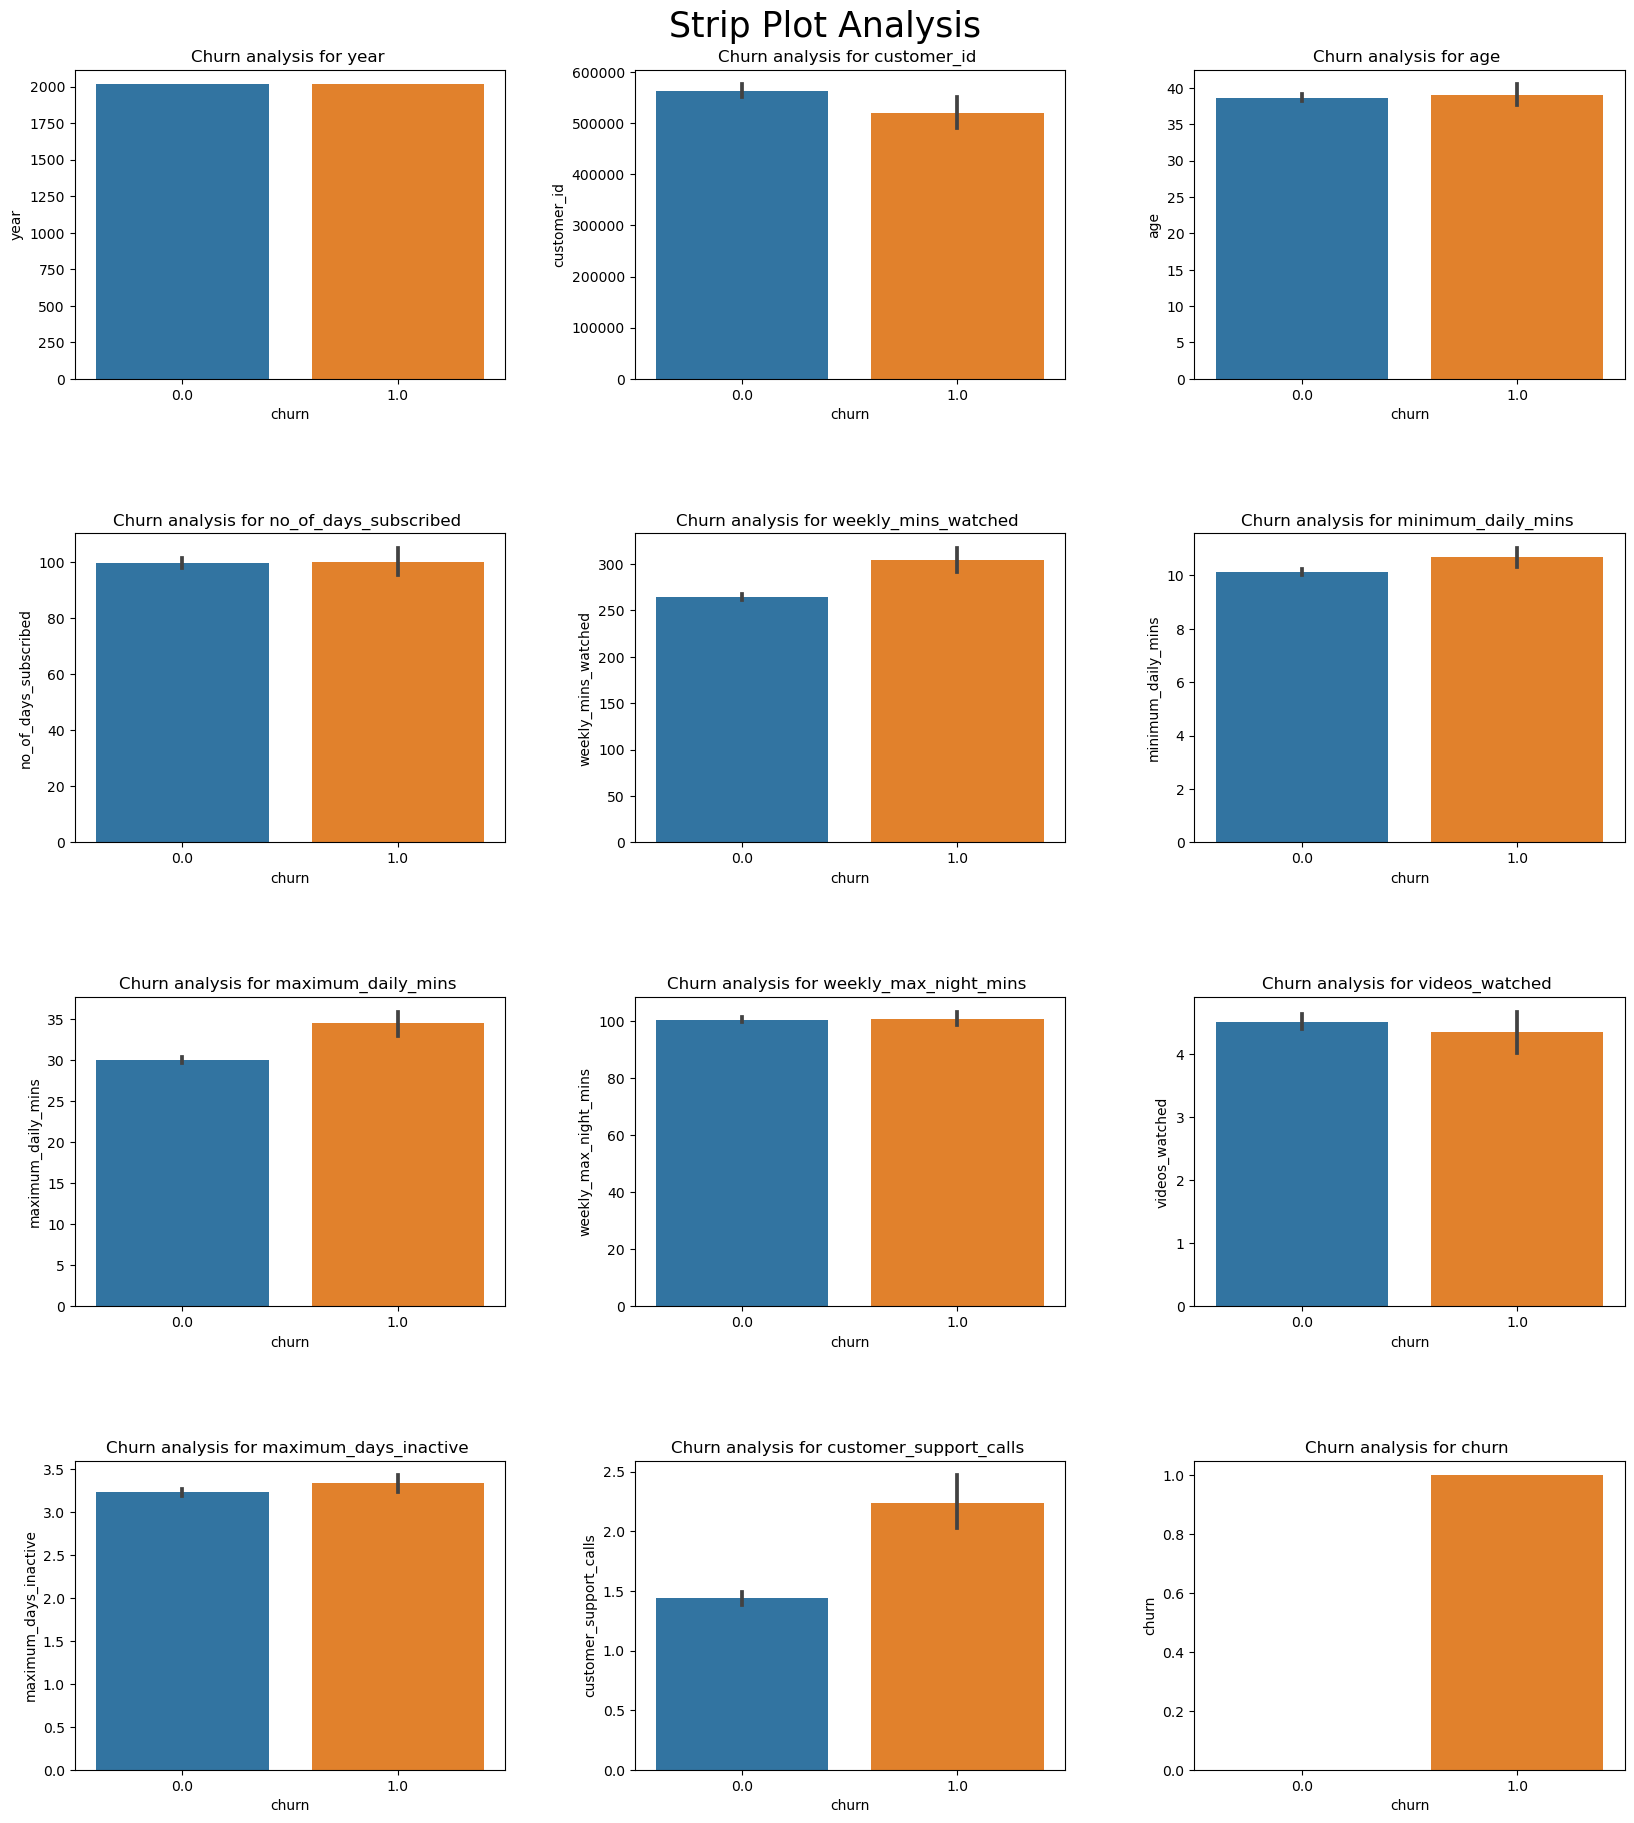

In [22]:
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.5, top=0.95, wspace= 0.3, bottom = 0.1)
fig.tight_layout()

for idx, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    ax1 = fig.add_subplot(4,3,idx+1)
    sns.barplot(y=df[col], x=df['churn'],ax=ax1)
    ax1.title.set_text(f'Churn analysis for {col} ')
    ax1.set_ylabel(col)
    
plt.suptitle('Strip Plot Analysis', fontsize=25)
plt.show()

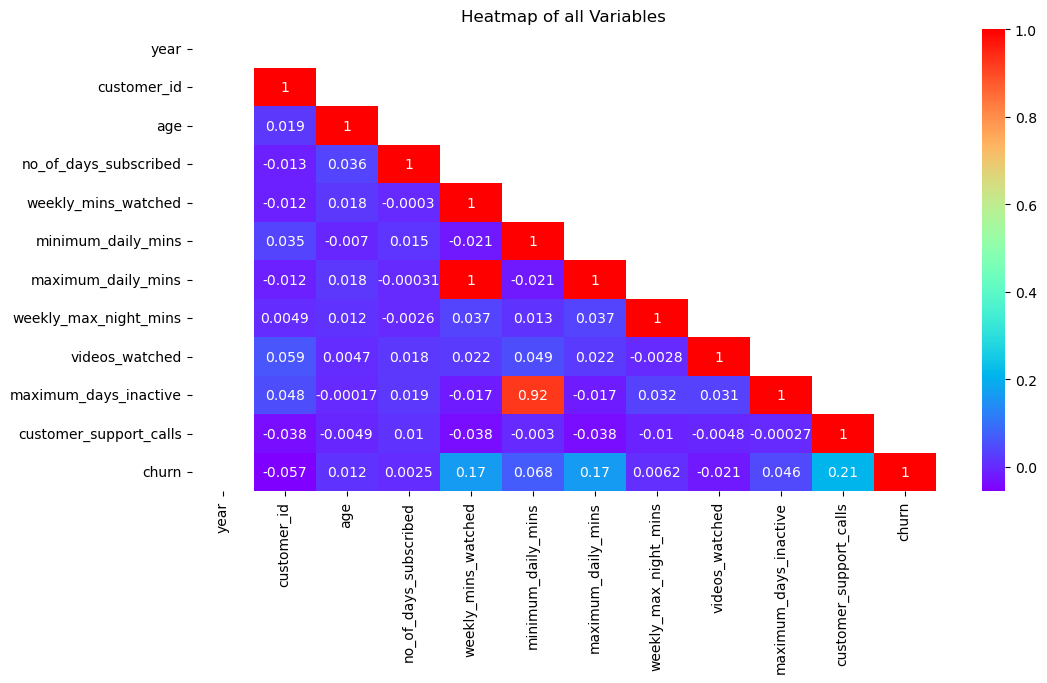

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='rainbow', mask=np.triu(df.corr(),+1))
plt.title('Heatmap of all Variables')
plt.show()

<Figure size 1200x600 with 0 Axes>

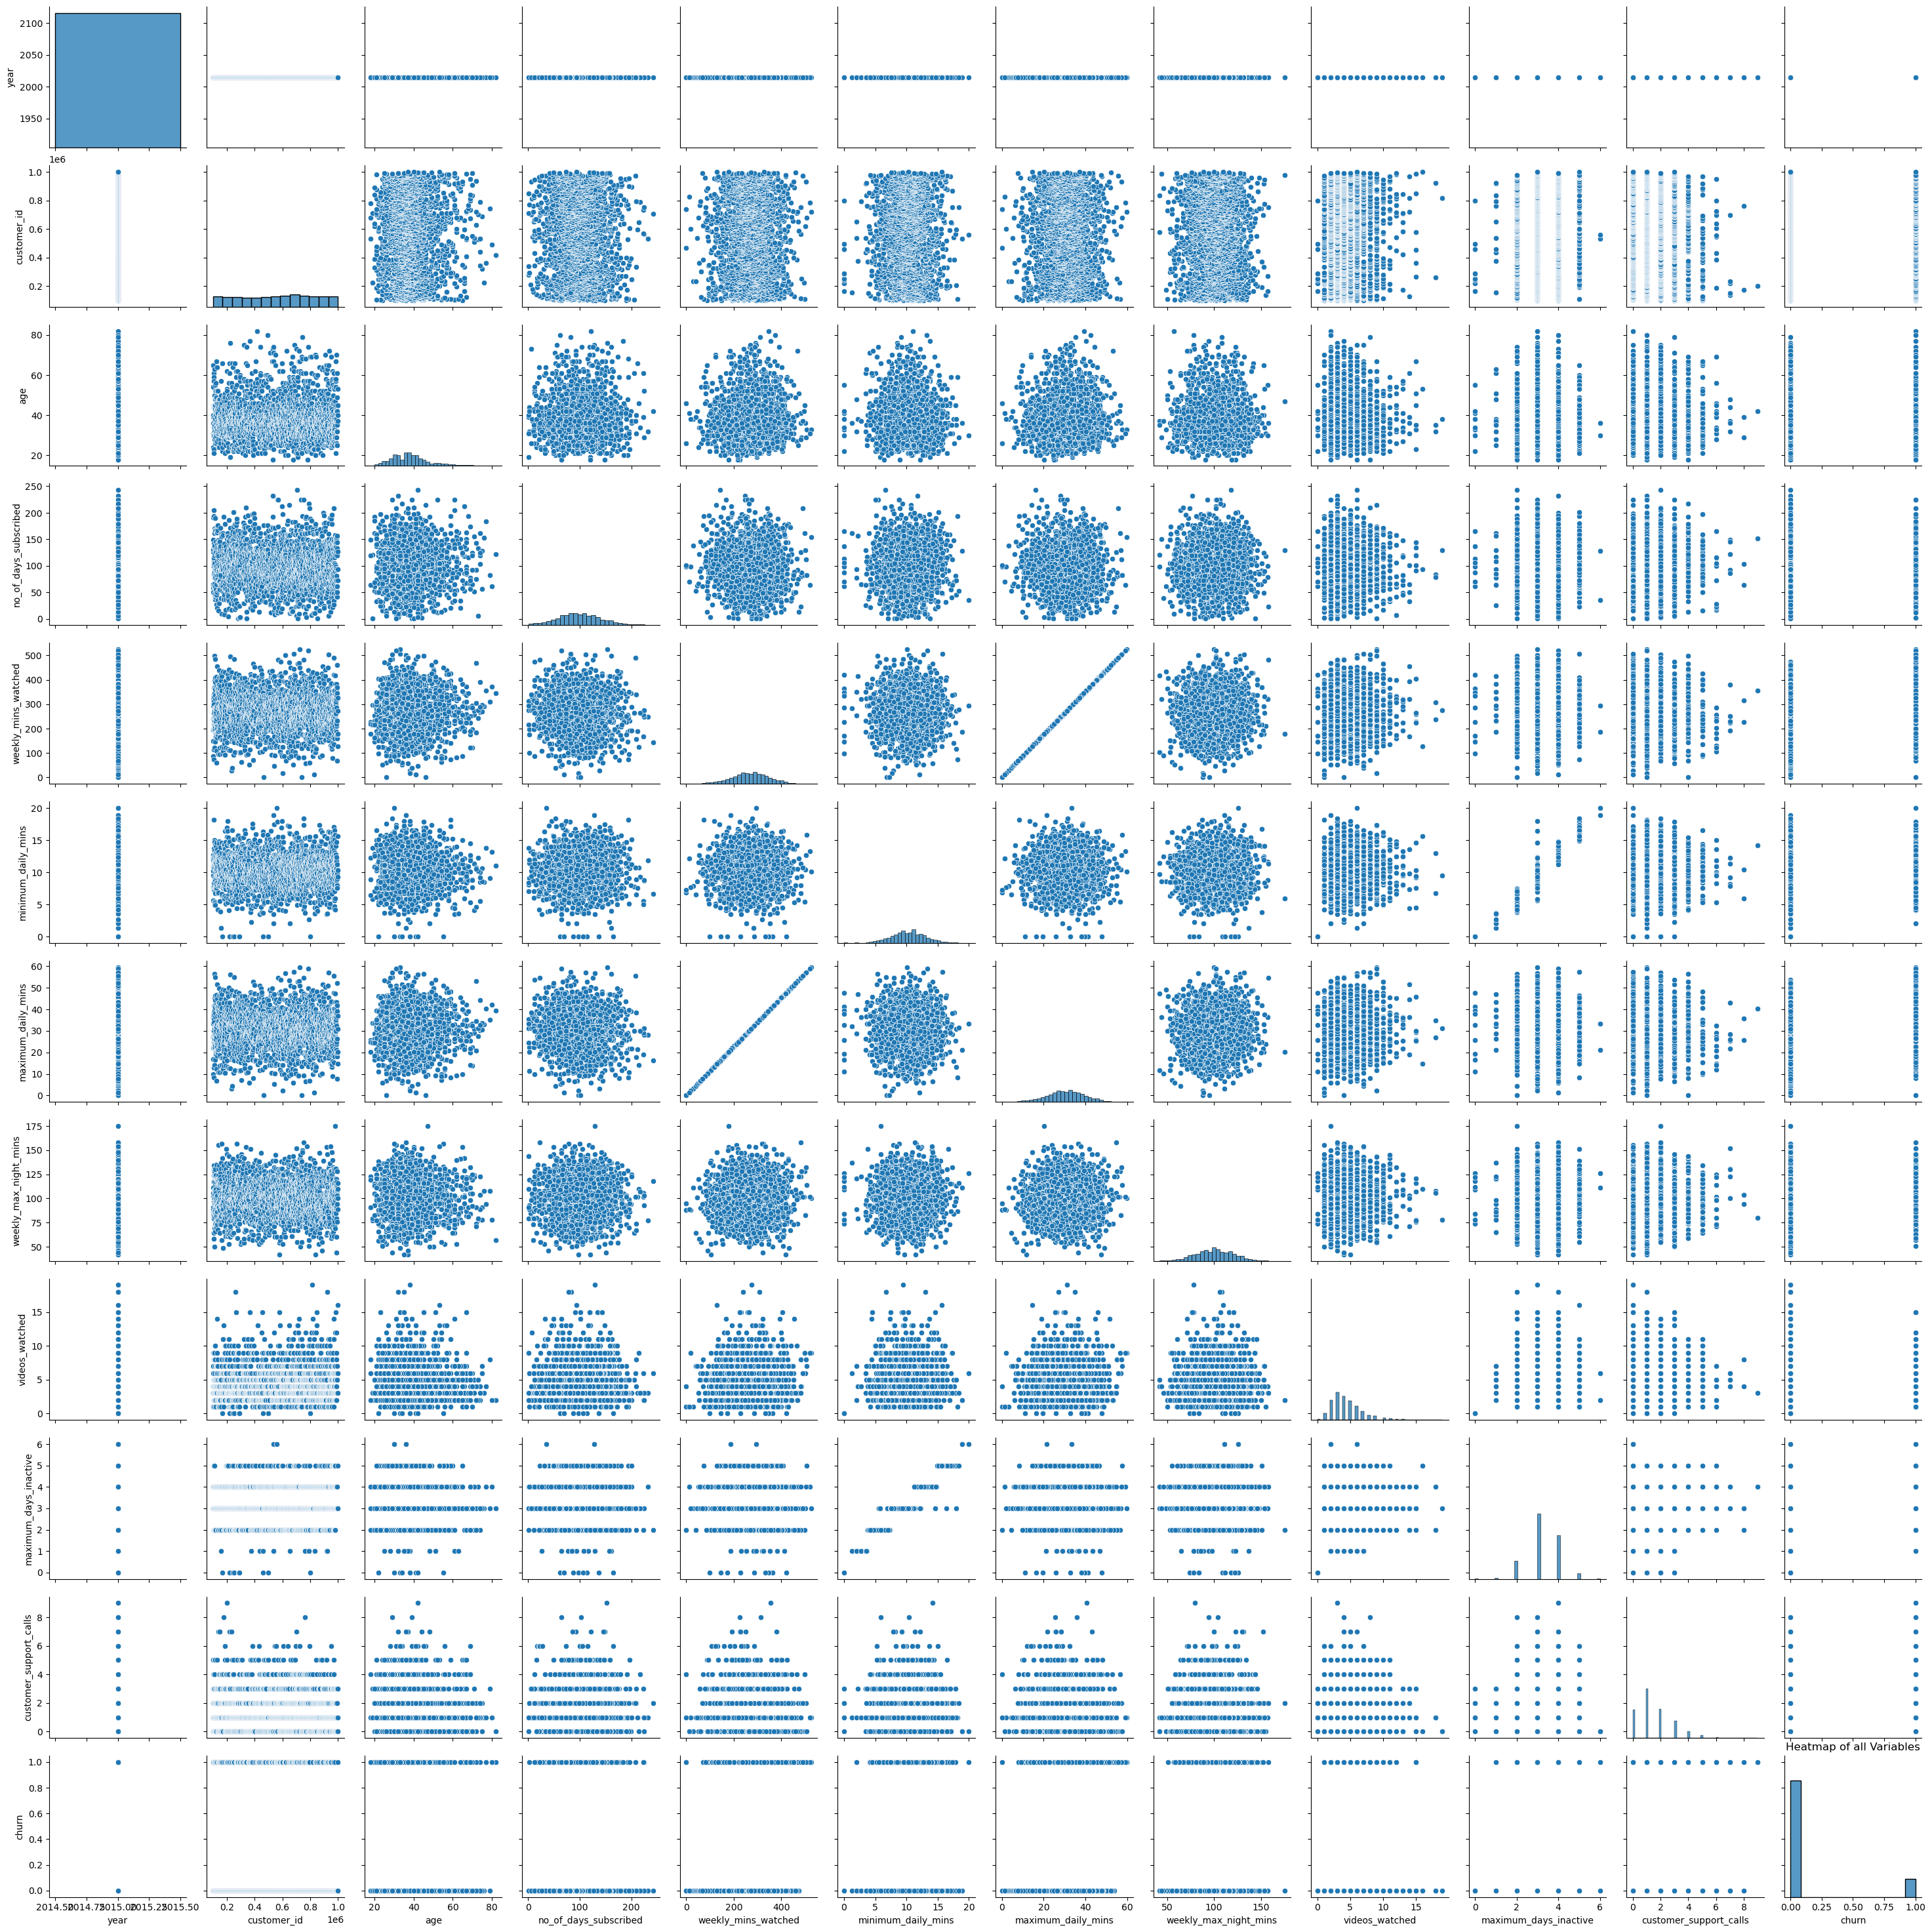

In [24]:
plt.figure(figsize=(12,6))
sns.pairplot(df)
plt.title('Heatmap of all Variables')
plt.show()

# V Data Encoding

In [25]:
gender_mapper = {'Female':0, 'Male':1}
df['gender'] = df['gender'].replace(gender_mapper)

multiscreen_mapper = {'no':0, 'yes':1}
df['multi_screen'] = df['multi_screen'].replace(multiscreen_mapper)

mailsubscribed_mapper = {'no':0, 'yes':1}
df['mail_subscribed'] = df['mail_subscribed'].replace(mailsubscribed_mapper)

df['churn'] = df['churn'].astype(int)

df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,0,36,62,0,0,148.35,12.2,16.81,82,1,4.0,1,0
1,2015,100643,340-5930,0,39,149,0,0,294.45,7.7,33.37,87,3,3.0,2,0
2,2015,100756,372-3750,0,65,126,0,0,87.30,11.9,9.89,91,1,4.0,5,1
3,2015,101595,331-4902,0,24,131,0,1,321.30,9.5,36.41,102,4,3.0,3,0
4,2015,101653,351-8398,0,40,191,0,0,243.00,10.9,27.54,83,7,3.0,1,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    1965 non-null   int64  
 1   customer_id             1965 non-null   int64  
 2   phone_no                1965 non-null   object 
 3   gender                  1965 non-null   int64  
 4   age                     1965 non-null   int64  
 5   no_of_days_subscribed   1965 non-null   int64  
 6   multi_screen            1965 non-null   int64  
 7   mail_subscribed         1965 non-null   int64  
 8   weekly_mins_watched     1965 non-null   float64
 9   minimum_daily_mins      1965 non-null   float64
 10  maximum_daily_mins      1965 non-null   float64
 11  weekly_max_night_mins   1965 non-null   int64  
 12  videos_watched          1965 non-null   int64  
 13  maximum_days_inactive   1965 non-null   float64
 14  customer_support_calls  1965 non-null   

In [27]:
df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,0,36,62,0,0,148.35,12.2,16.81,82,1,4.0,1,0
1,2015,100643,340-5930,0,39,149,0,0,294.45,7.7,33.37,87,3,3.0,2,0
2,2015,100756,372-3750,0,65,126,0,0,87.30,11.9,9.89,91,1,4.0,5,1
3,2015,101595,331-4902,0,24,131,0,1,321.30,9.5,36.41,102,4,3.0,3,0
4,2015,101653,351-8398,0,40,191,0,0,243.00,10.9,27.54,83,7,3.0,1,0


In [28]:
df_for_model = df.drop('phone_no', axis=1)

In [29]:
df_for_model.head()

,year,customer_id,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,0,36,62,0,0,148.35,12.2,16.81,82,1,4.0,1,0
1,2015,100643,0,39,149,0,0,294.45,7.7,33.37,87,3,3.0,2,0
2,2015,100756,0,65,126,0,0,87.30,11.9,9.89,91,1,4.0,5,1
3,2015,101595,0,24,131,0,1,321.30,9.5,36.41,102,4,3.0,3,0
4,2015,101653,0,40,191,0,0,243.00,10.9,27.54,83,7,3.0,1,0


In [31]:
df_for_model.to_csv('../data/AfterDataCleaning.csv', index_label= False)